# SLR FINAL EXAM

## 1.Dataset Ingestion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
day=pd.read_csv('day.csv')
hour=pd.read_csv('hour.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day.shape

(731, 16)

In [6]:
hour.shape

(17379, 17)

In [7]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
hour.info() #only date feautre is object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
print(hour.isnull().sum()) #null value check
print('There are no null values')

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
There are no null values


### 2.Splitting DataSet

In [15]:
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
x=hour[['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']]
y=hour.cnt
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### 3. Build a base model

In [22]:
import statsmodels.api as sm
y=hour.cnt
x=hour[['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']]
x=sm.add_constant(x)
ols=sm.OLS(y,x).fit()
pred_ols=ols.predict(x)
ols.summary()

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.559e+31
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:47:09   Log-Likelihood:             4.5883e+05
No. Observations:               17379   AIC:                        -9.176e+05
Df Residuals:                   17363   BIC:                        -9.175e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.882e-16   4.39e-14     -0.020      0.984   -8.69e-14    8.51e-14
instant      2.19e-17   2.99e-17      0.731      0.465   -3.68e-17    8.06e-17
season     -1.824e-13   1.07e-14    -17.113      0.000   -2.03e-13   -1.62e-13
yr         -2.505e-13   2.62e-13     -0.955      0.339   -7.64e-13    2.63e-13
mnth       -3.575e-14   2.21e-14     -1.621      0.105    -7.9e-14    7.49e-15
hr          3.053e-15   1.02e-15      2.988      0.003    1.05e-15    5.06e-15
holiday     2.159e-14   3.91e-14      0.552      0.581   -5.51e-14    9.83e-14
weekday     1.166e-14   3.16e-15      3.690      0.000    5.46e-15    1.79e-14
workingday -3.686e-14    1.6e-14     -2.305      0.021   -6.82e-14   -5.51e-15
weathersit  7.327e-15   1.11e-14      0.658      0.511   -1.45e-14    2.92e-14
temp        2.816e-13   2.16e-13      1.303      0.193   -1.42e-13    7.05e-13
atemp       3.233e-13   2.43e-13      1.331      0.183   -1.53e-13    7.99e-13
hum        -8.421e-14    4.2e-14     -2.003      0.045   -1.67e-13   -1.79e-15
windspeed  -1.973e-14   5.62e-14     -0.351      0.726    -1.3e-13    9.05e-14
casual         1.0000   1.88e-16   5.31e+15      0.000       1.000       1.000
registered     1.0000   5.55e-17    1.8e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     3826.192   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7939.424
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       5.049   Cond. No.                     5.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(xtrain,ytrain)
pred_lr_base=lr.predict(xtest)
print('Train Score:',lr.score(xtrain,ytrain))
print('Test Score:',lr.score(xtest,ytest))
print('RMSE:',np.sqrt(mean_squared_error(pred_lr_base,ytest)))

Train Score: 1.0
Test Score: 1.0
RMSE: 2.6700718603741907e-11


The base model is an overfitting model.

### 4.EDA - Plots

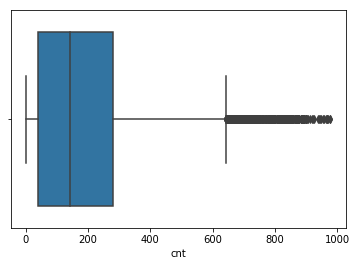

In [26]:
sns.boxplot(hour.cnt) #checking for outliers in target variable

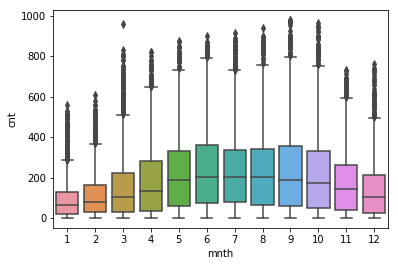

In [29]:
sns.boxplot(x='mnth',y='cnt',data=hour) #checking for outliers month wise in the target variable

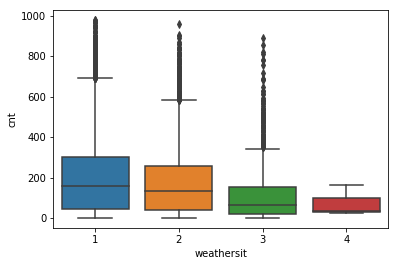

In [31]:
sns.boxplot(x='weathersit',y='cnt',data=hour)

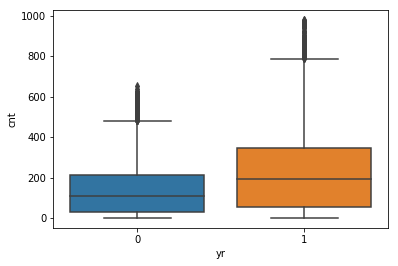

In [32]:
sns.boxplot(x='yr',y='cnt',data=hour)

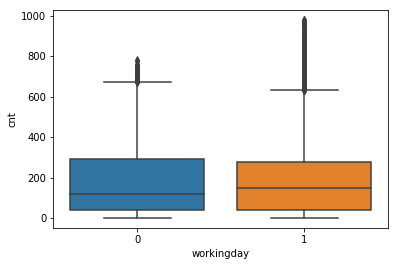

In [33]:
sns.boxplot(x='workingday',y='cnt',data=hour)

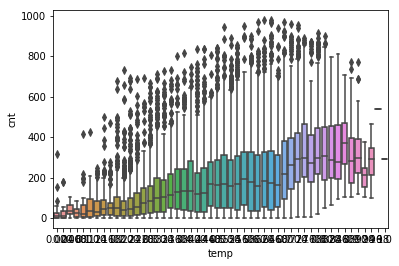

In [34]:
sns.boxplot(x='temp',y='cnt',data=hour)

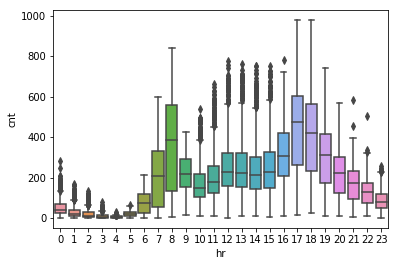

In [35]:
sns.boxplot(x='hr',y='cnt',data=hour)

Inference from Box-Plots:

1)From the above plots it is visible that higher the temperature higher is the count of rented bikes.(count vs temp)

2)The plot of working day and count shows a lot of rented bikes on working days rather than holidays.(count vs working day)

3)There is a signiificant rise in rented bike count in the year 2012 than year 2011.(count vs year)

4)There is a rise in rented bikes on a clear,sunny day.(count vs weather situation)

5) count is maximum at 8am on a day.(count vs hr)



In [73]:
q1=hour.cnt.quantile(0.25)
q3=hour.cnt.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
train=xtrain
train['cnt']=ytrain
train_outliers = train[(train.cnt >= ll) & (train.cnt <= ul)]
print('Outlier Detection')
print('Rows with outliers:',len(train))
print('Rows w/o Outliers:',len(train_outliers))
print('Total number of outliers in the data:',len(train)-len(train_outliers))

Outlier Detection
Rows with outliers: 12165
Rows w/o Outliers: 11818
Total number of outliers in the data: 347


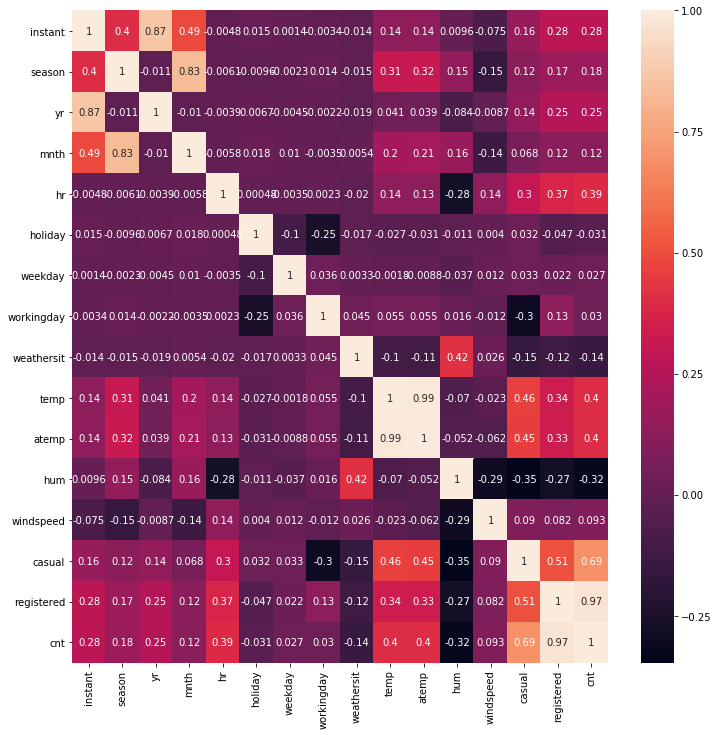

In [50]:
plt.figure(figsize=[12,12])
sns.heatmap(hour.corr(),annot=True)

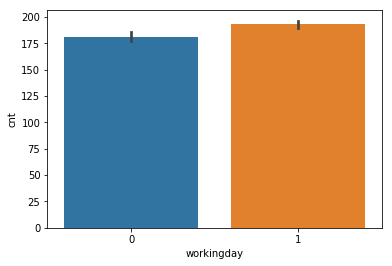

In [69]:
sns.barplot(x='workingday',y='cnt',data=hour)

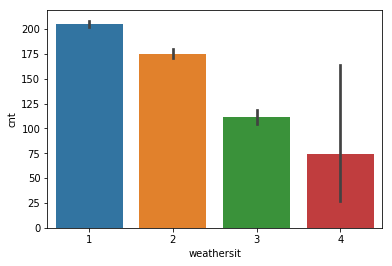

In [70]:
sns.barplot(x='weathersit',y='cnt',data=hour)

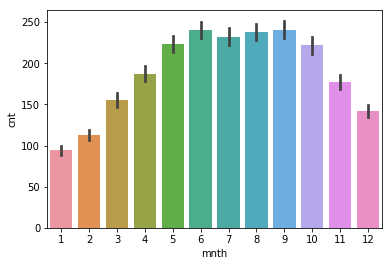

In [55]:
sns.barplot(x='mnth',y='cnt',data=hour)

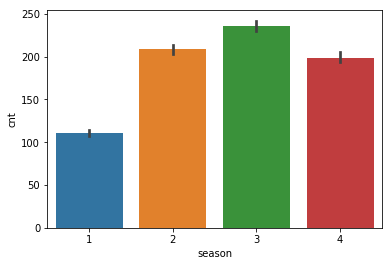

In [56]:
sns.barplot(x='season',y='cnt',data=hour)

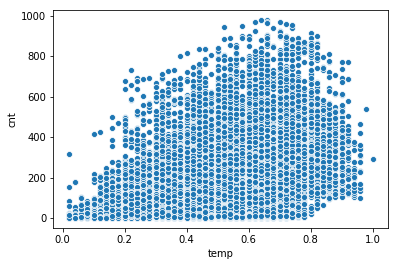

In [60]:
sns.scatterplot(x='temp',y='cnt',data=hour)

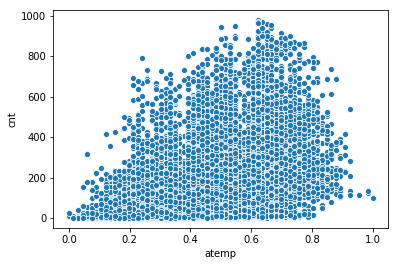

In [61]:
sns.scatterplot(x='atemp',y='cnt',data=hour)

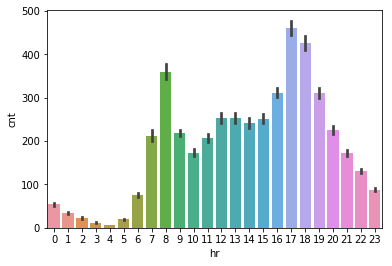

In [71]:
sns.barplot(x='hr',y='cnt',data=hour)

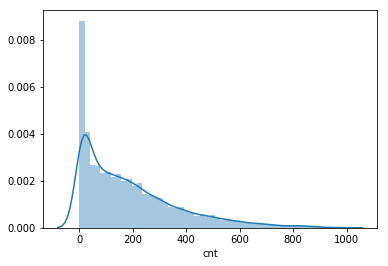

In [68]:
sns.distplot(hour.cnt)

Inferences from EDA Plots-

1) Correlation analysis-

a)Features casual and registered have direct information about count.
                      
b)Features temp and atemp are directly correlated to each other so it is advisable to only consider one of them.

c)feature hr and temp have good correlation with count.

2)Outlier- Data was checked for outliers and there are a total of 347 outliers present in tha data.

3) The target variable does not seem to have a normal distribution and appears to be right skewed.


### 6. Multi Collinearity Check

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X=train_outliers.drop('cnt',axis=1) 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1987.693229,instant
1,20.478311,season
2,754.765186,yr
3,599.664024,mnth
4,4.363682,hr
5,1.106593,holiday
6,3.091137,weekday
7,4.166360,workingday
8,7.602654,weathersit
9,310.845565,temp


### 7.Apply Feature Selection Technique

In [81]:
x_k=hour.drop(['cnt','dteday'],axis=1)
y_k=hour.cnt


1.KBest Technique

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x_k,y_k)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_k.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(20,'Score'))

       Feature          Score
14  registered  299011.649004
13      casual   16196.505743
9         temp    3404.922563
10       atemp    3328.251264
4           hr    3194.614220
11         hum    2022.848305
0      instant    1459.748090
2           yr    1163.365167
1       season     568.955770
8   weathersit     359.794510
3         mnth     256.630498
12   windspeed     152.374764
5      holiday      16.636980
7   workingday      15.951823
6      weekday      12.583145


2.Heatmap

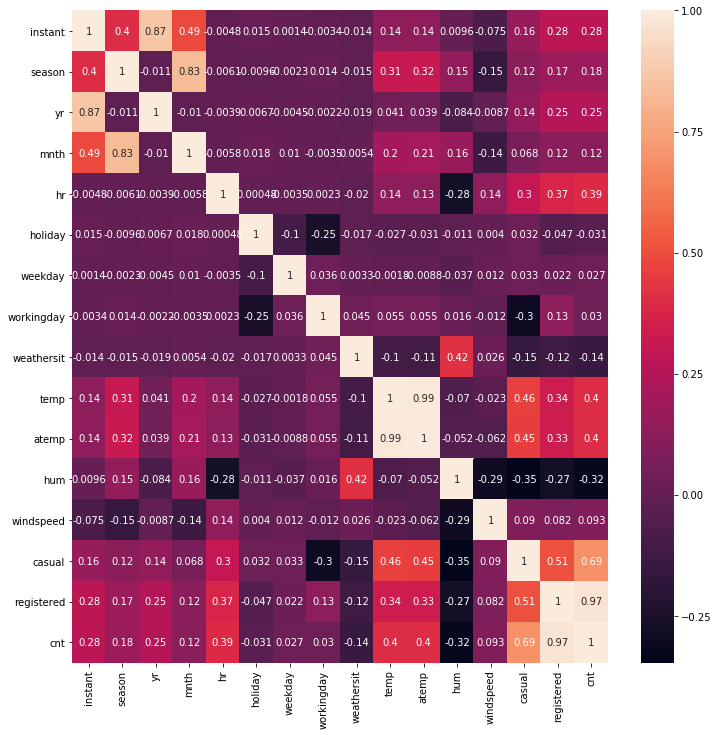

In [86]:
plt.figure(figsize=[12,12])
sns.heatmap(hour.corr(),annot=True)

### 8. Data Transformation

In [101]:
x_train=train.drop(['cnt','atemp','casual','registered','instant'],axis=1)
y_train=train.cnt

In [102]:
x_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
8112,4,0,12,16,0,5,1,1,0.36,0.62,0.1343
12671,2,1,6,4,0,0,0,1,0.54,0.64,0.0896
3889,2,0,6,23,0,3,1,1,0.62,0.53,0.0000
10805,2,1,3,8,0,6,0,2,0.36,0.87,0.1940
13741,3,1,7,18,0,2,1,1,0.76,0.55,0.2836


In [103]:
x_test=xtest.drop(['instant','atemp','casual','registered'],axis=1)
x_test.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
3439,2,0,5,5,0,6,0,1,0.56,0.88,0.2239
6542,4,0,10,4,0,3,1,1,0.44,0.88,0.0000
15470,4,1,10,19,0,4,1,1,0.44,0.51,0.1343
9851,1,1,2,11,1,1,0,1,0.26,0.48,0.3582
12640,2,1,6,21,0,5,1,1,0.66,0.50,0.1045


In [104]:
sc=StandardScaler()
x_train[['temp','hum','windspeed']]=sc.fit_transform(x_train[['temp','hum','windspeed']])
x_test[['temp','hum','windspeed']]=sc.transform(x_test[['temp','hum','windspeed']])

In [106]:
x_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
8112,4,0,12,16,0,5,1,1,-0.717904,-0.028376,-0.457636
12671,2,1,6,4,0,0,0,1,0.217239,0.075739,-0.824039
3889,2,0,6,23,0,3,1,1,0.632859,-0.496895,-1.558485
10805,2,1,3,8,0,6,0,2,-0.717904,1.273067,0.031721
13741,3,1,7,18,0,2,1,1,1.360192,-0.392780,0.766167


In [107]:
x_test.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
3439,2,0,5,5,0,6,0,1,0.321144,1.325124,0.276809
6542,4,0,10,4,0,3,1,1,-0.302285,1.325124,-1.558485
15470,4,1,10,19,0,4,1,1,-0.302285,-0.601011,-0.457636
9851,1,1,2,11,1,1,0,1,-1.237428,-0.757184,1.377658
12640,2,1,6,21,0,5,1,1,0.840668,-0.653068,-0.701905


### Model Fitting (linear regression) on scaled data

In [109]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Linear Regression')
print('Train Score:',lr.score(x_train,y_train))
print('Test Score:',lr.score(x_test,ytest))
print('RMSE:',np.sqrt(mean_squared_error(pred_lr,ytest)))

Linear Regression
Train Score: 0.3829546781175881
Test Score: 0.3982902858066919
RMSE: 140.9974494708831


In [124]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from prettytable import PrettyTable

In [ ]:
Validation = PrettyTable()
Validation.field_names = ["Model", "RMSE", "Train  R2 Score","Test R2 Score"]

models = [
    Lasso(alpha=0.1),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    BaggingRegressor(),
    RandomForestRegressor( random_state=0, n_estimators=300),
    DecisionTreeRegressor (criterion='mse', splitter='best',random_state=0),
    KNeighborsRegressor(),
    LinearRegression()
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(ytest, y_res))
    train_score = model.score(x_train, y_train)    
    test_score=model.score(x_test,ytest)
    Validation.add_row([type(model).__name__, format(rmse, '.3f'), format(train_score, '.3f'),format(test_score, '.3f')])

print(Validation)

In [ ]:
la=[]
lb=[]
lc=['Ridge','SVR','Bagging','RandomForest','Dtree','knn','linear']
models = [ Lasso(alpha=0.1),
    Ridge(alpha=.6),
    SVR(gamma='auto', kernel='linear'),
    BaggingRegressor(),
    RandomForestRegressor( random_state=0, n_estimators=400),
    DecisionTreeRegressor (criterion='mse', splitter='best',random_state=0),
    KNeighborsRegressor(),
    LinearRegression()
]

for model in models:
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test) 
    mse = mean_squared_error(ytest, Y_pred)
    r2score = model.score(x_test, ytest)
    la.append(mse)
    lb.append(r2score)
best_model={'Model':lc,'Mse':la,'R2score':lb}
d1=pd.DataFrame(best_model)

#### Random Forest Regressor gives best results hence is chosen.

In [128]:
rf=RandomForestRegressor(n_estimators=50,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=459,
    verbose=0,
    warm_start=False,)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print('Test Score:',rf.score(x_test,ytest))
print('RMSE:',np.sqrt(mean_squared_error(pred_rf,ytest)))

Test Score: 0.9378494346050862
RMSE: 45.31482291388275


Random Forest gives best result from the above mentioned models and is advisable for further predictions.